In [19]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import datetime, timedelta
import os

In [20]:
# calculate the first day of each of last two weeks

def first_day_last_two_weeks(date:datetime)->datetime:
    dow_d=date.weekday()
    first_date=date-timedelta(days=(dow_d+1)+13)
    second_date=date-timedelta(days=(dow_d+1)+6)
    return [first_date,second_date]

In [21]:
run_dates=first_day_last_two_weeks(datetime(2021,12,18))
connection_string = 'sqlite:///../../../Lectures/Lecture 4/data/data.db'
tokens=pd.read_sql(f'''
SELECT DISTINCT
    token 
FROM ohlc
''', connection_string)["token"].to_list()

In [22]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [23]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=7)}', end='\r')
        res = pm.execute_notebook(
            'template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{run_date.year}-{run_date.month}-{run_date.day}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=7)}',
                'token': token,
                'connection_string': connection_string
            }
        )

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

Executing:   0%|          | 0/12 [00:00<?, ?cell/s]

In [31]:
nbs = sb.read_notebooks('outputs')
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'avg_hourly_return':scrap["prices"].data.hourly_return.mean(),
        'avg_volatility': scrap['prices'].data.hourly_vol.mean(),
        'maximum_drawdown': scrap["prices"].data.maximum_drawdown.max(),
        'range_of_close_price': scrap["prices"].data.close.iloc[-1]-scrap["prices"].data.close.iloc[0]
    }) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,avg_hourly_return,avg_volatility,maximum_drawdown,range_of_close_price
0,AAVE,2021-11-29 00:00:00,2021-12-06 00:00:00,-0.001235,0.221054,0.384064,-46.8080
1,AAVE,2021-12-06 00:00:00,2021-12-13 00:00:00,-0.000304,0.200400,0.201134,-11.6730
2,ADA,2021-11-29 00:00:00,2021-12-06 00:00:00,-0.000850,0.226749,0.269764,-0.2305
3,ADA,2021-12-06 00:00:00,2021-12-13 00:00:00,-0.000070,0.203766,0.194625,-0.0297
4,ATOM,2021-11-29 00:00:00,2021-12-06 00:00:00,-0.000489,0.340796,0.344426,-2.8370
5,ATOM,2021-12-06 00:00:00,2021-12-13 00:00:00,0.000112,0.254383,0.158846,-0.0040
6,AVAX,2021-11-29 00:00:00,2021-12-06 00:00:00,-0.001428,0.320661,0.372992,-25.6000
7,AVAX,2021-12-06 00:00:00,2021-12-13 00:00:00,0.000211,0.249173,0.204381,1.1800
8,BTC,2021-11-29 00:00:00,2021-12-06 00:00:00,-0.000861,0.175543,0.285516,-7979.4100
9,BTC,2021-12-06 00:00:00,2021-12-13 00:00:00,0.000127,0.134449,0.100168,833.1100


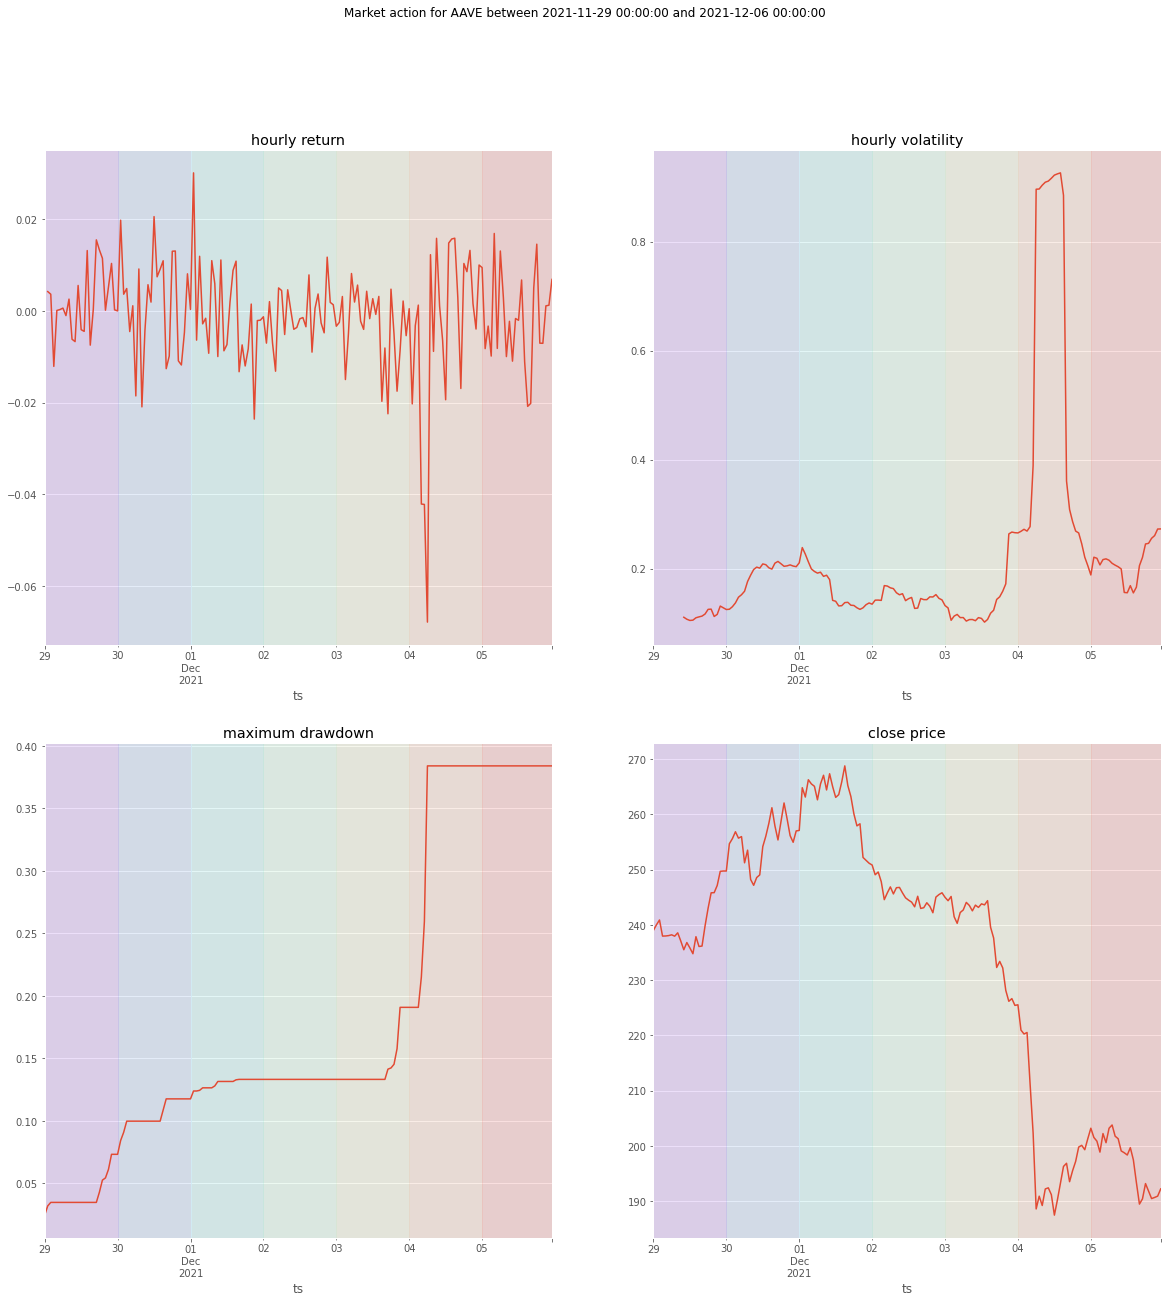

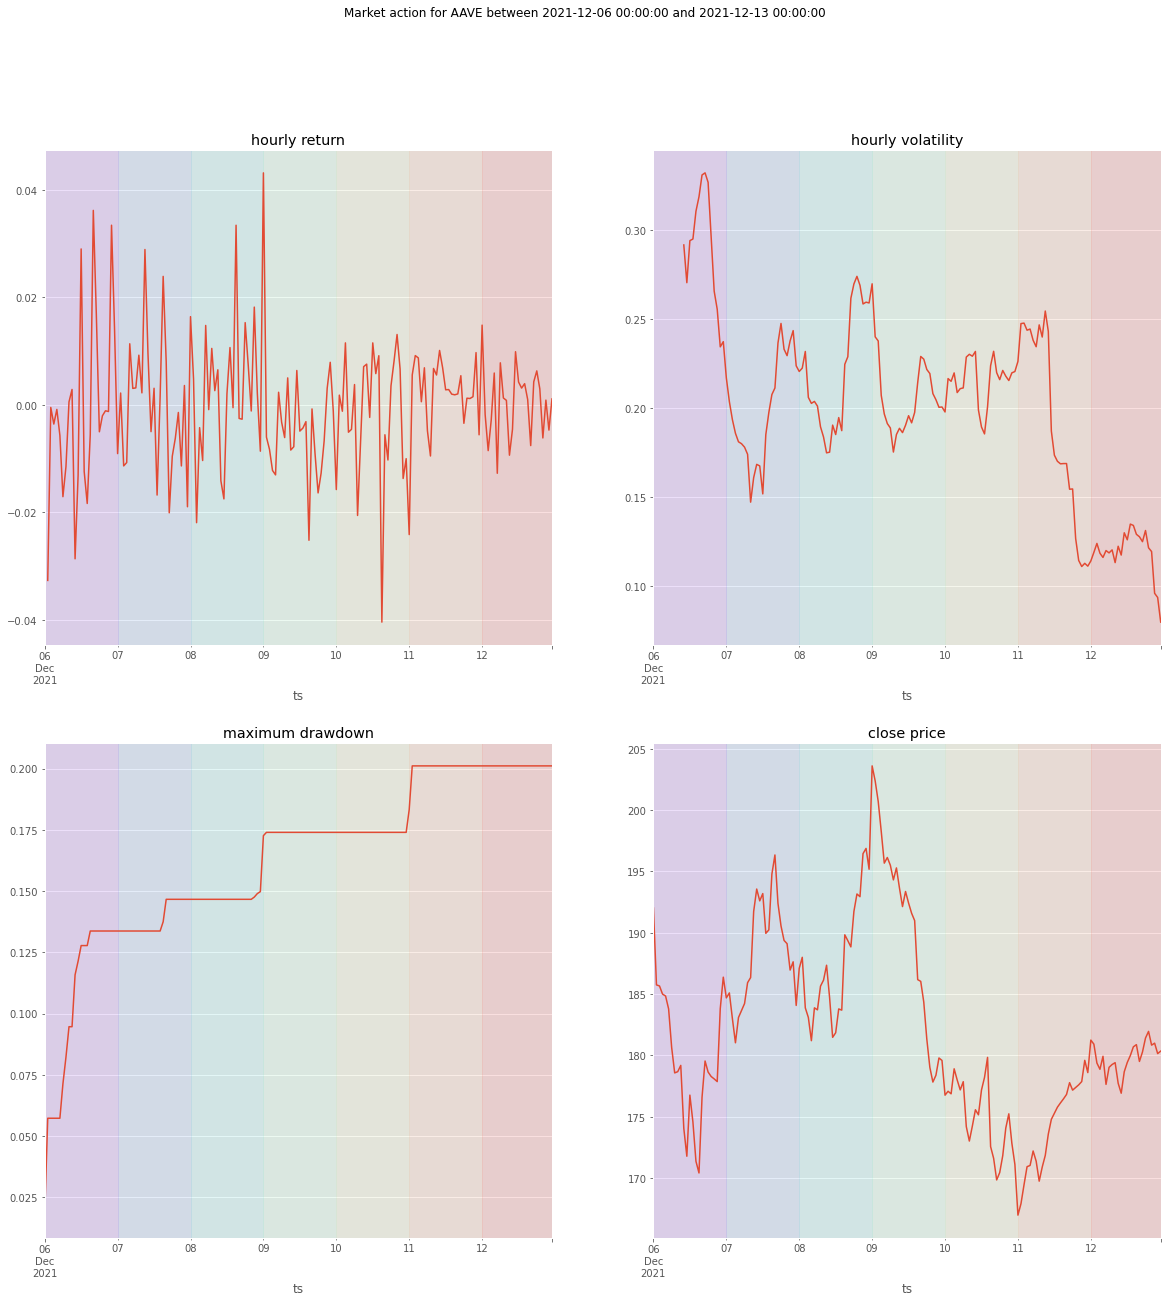

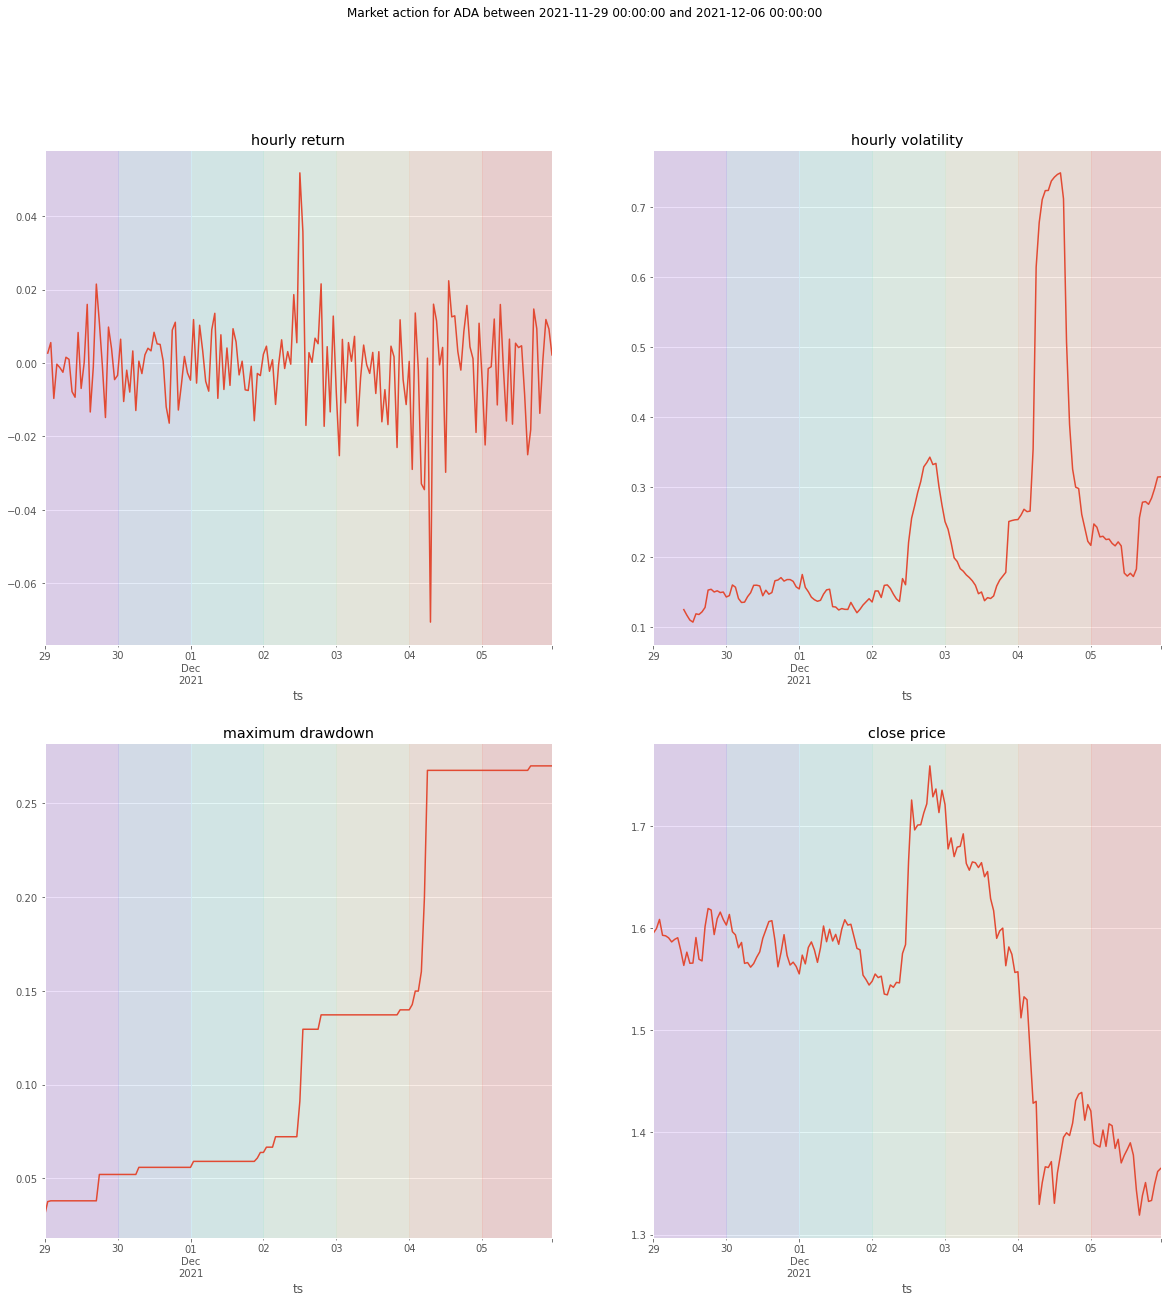

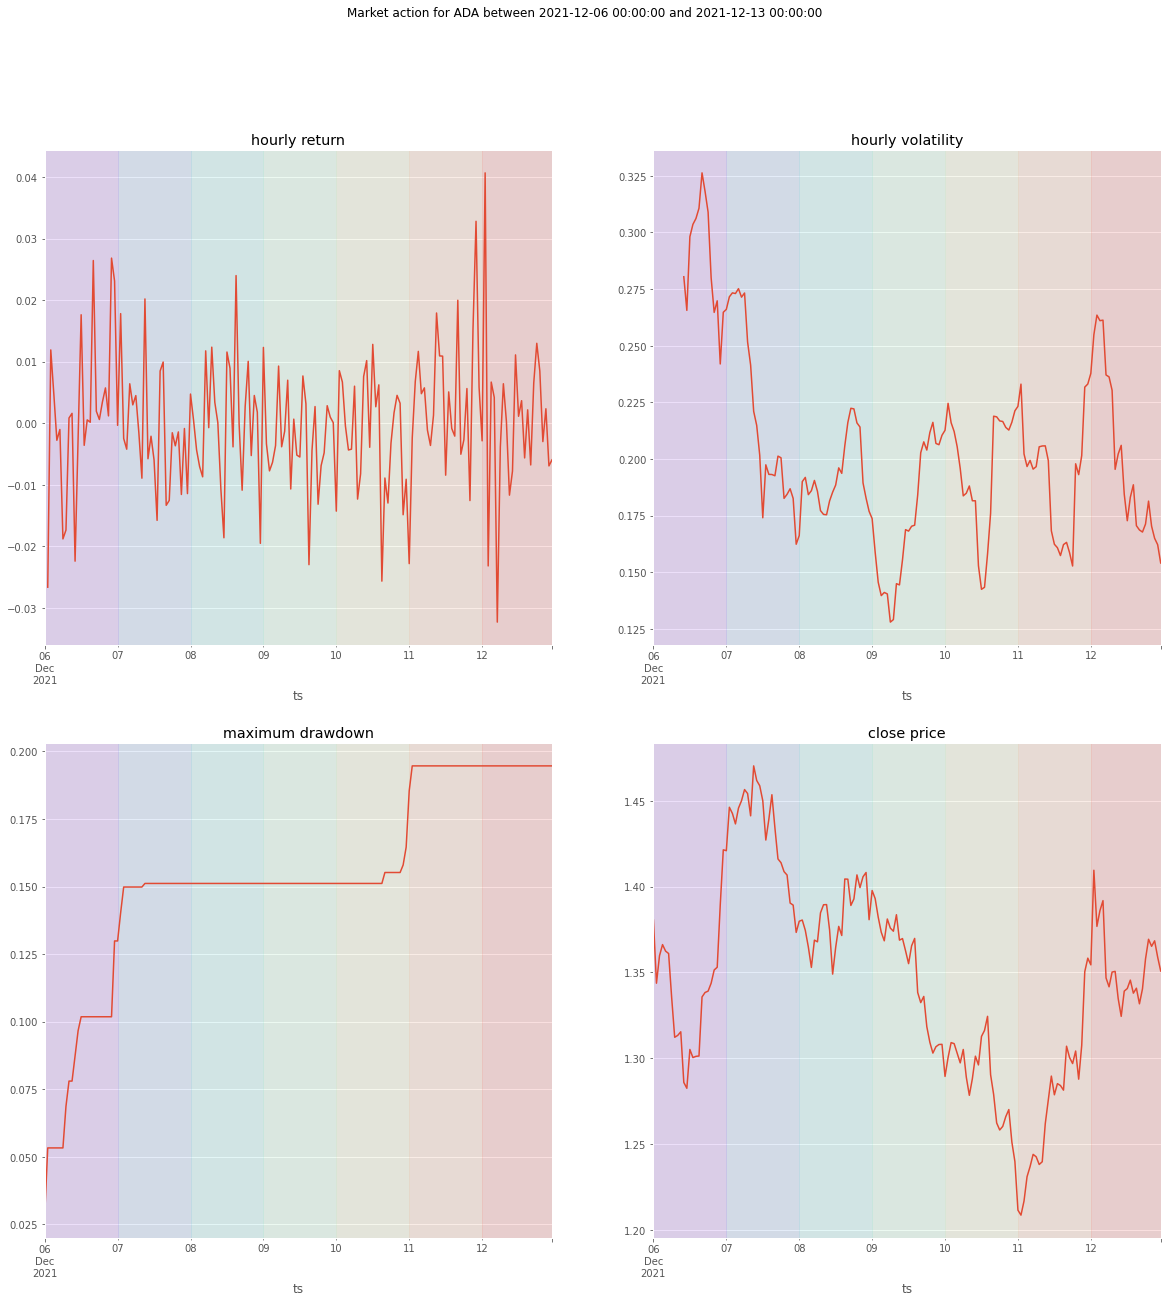

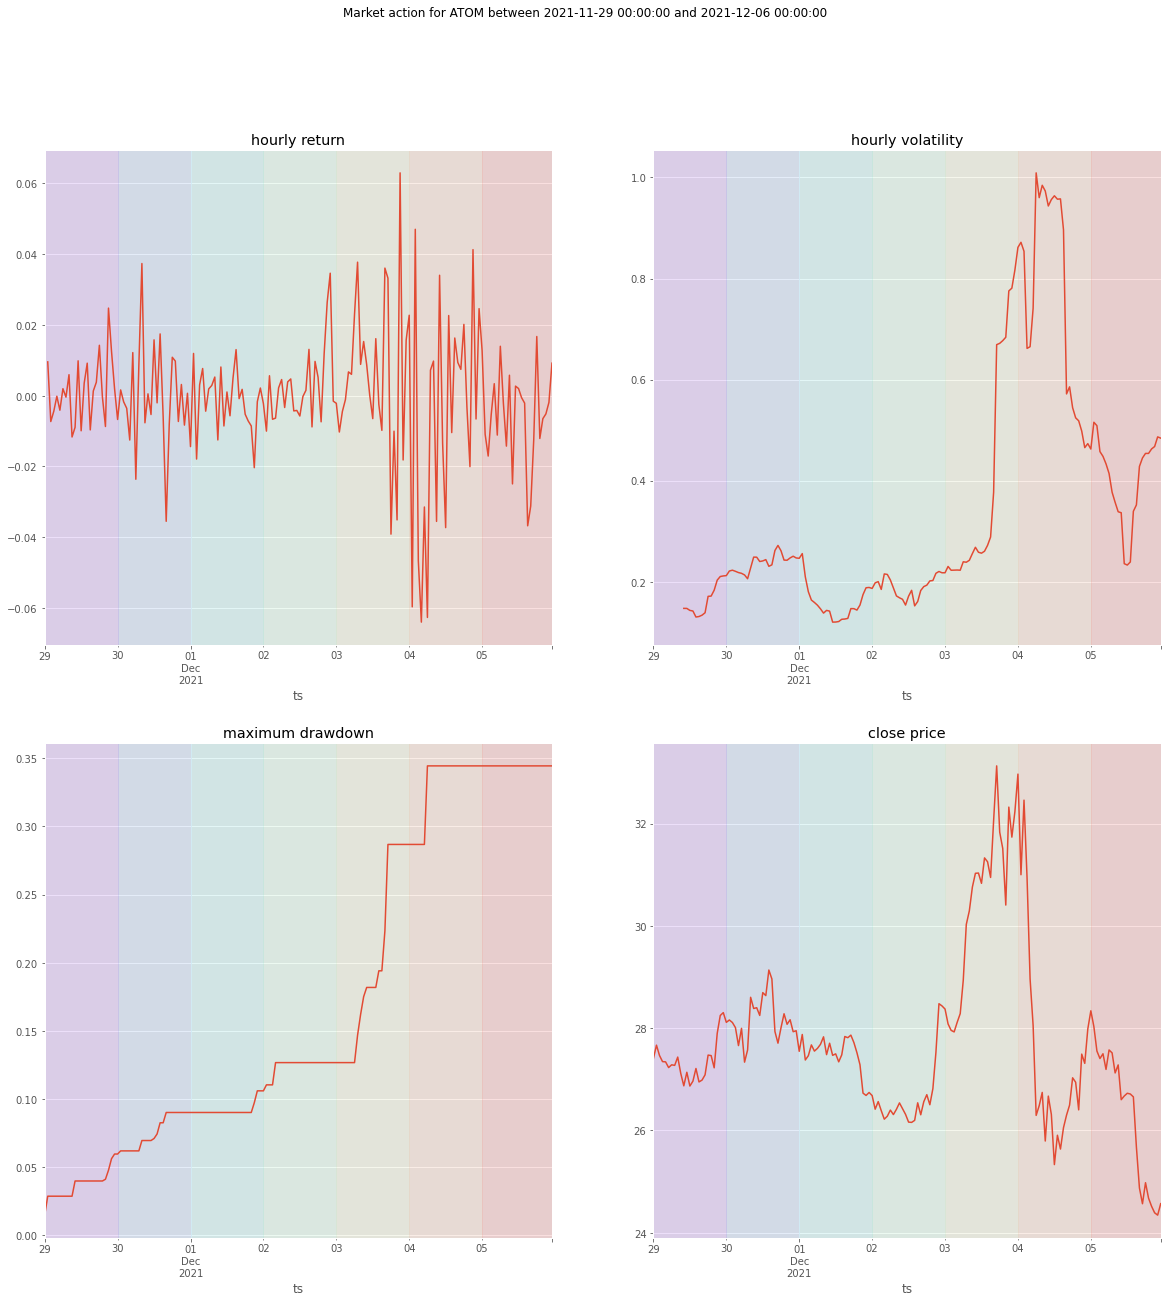

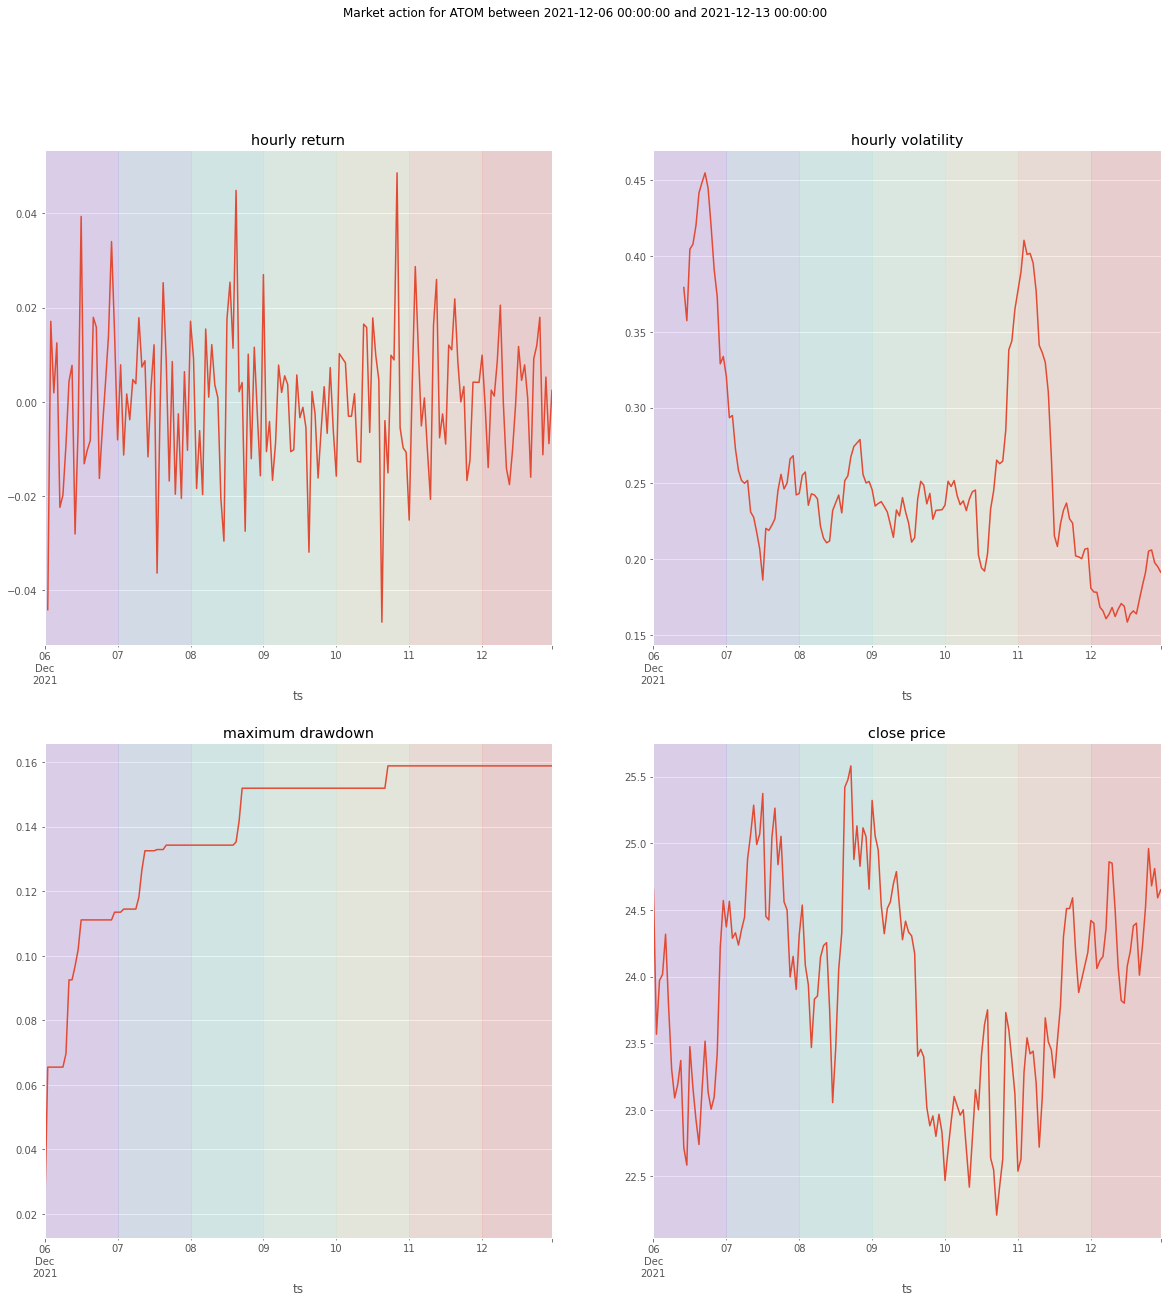

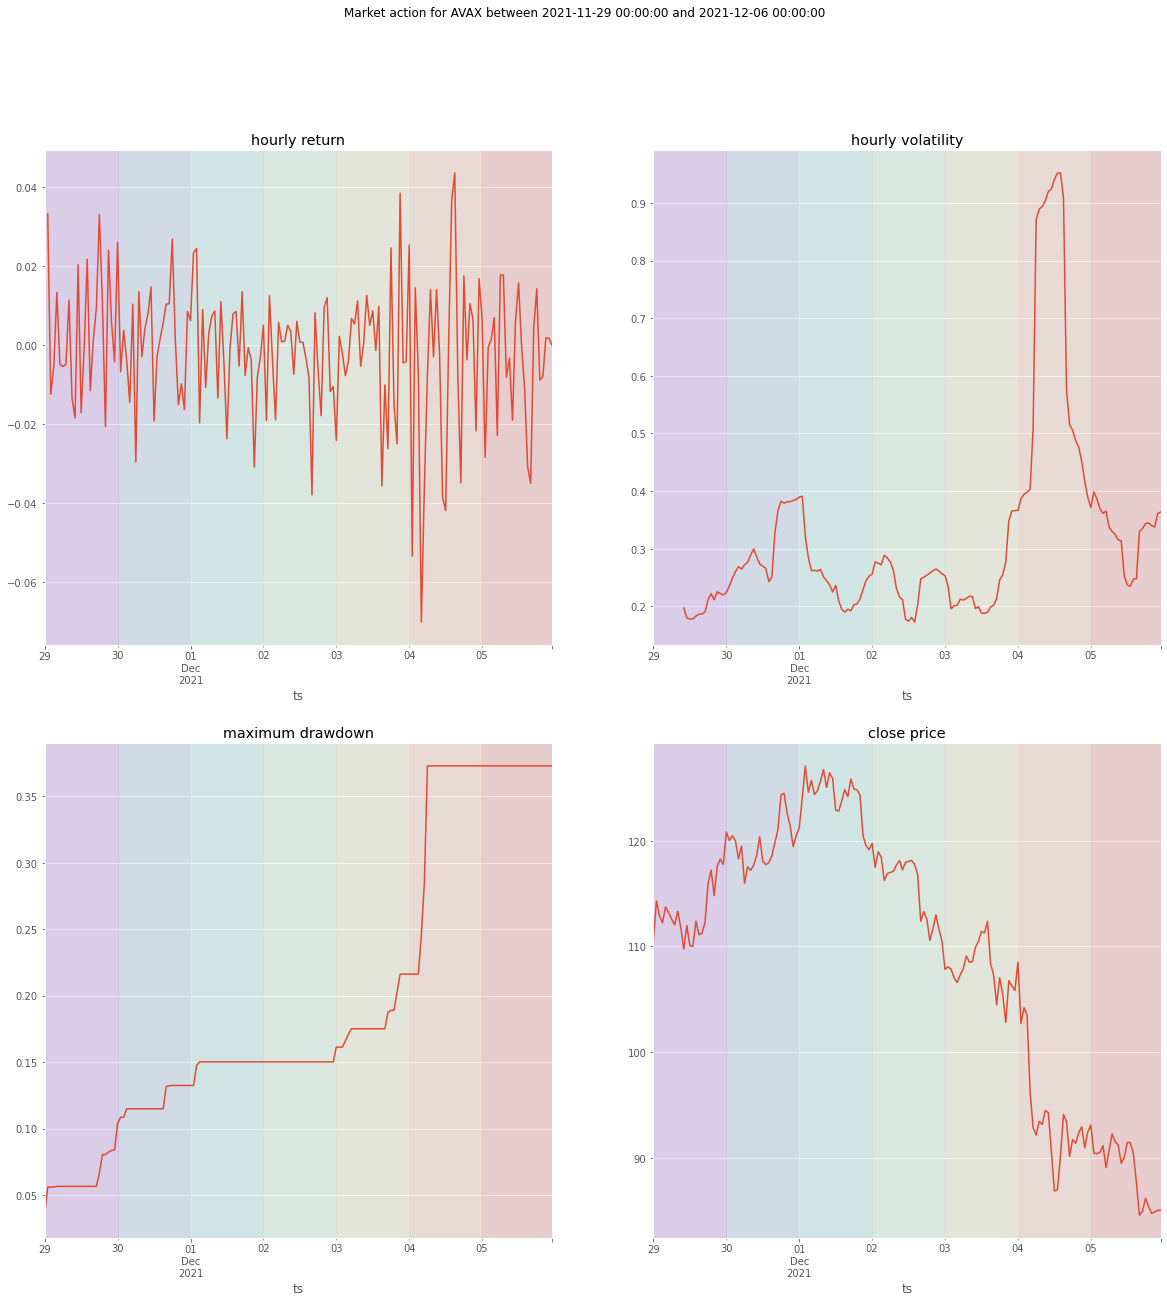

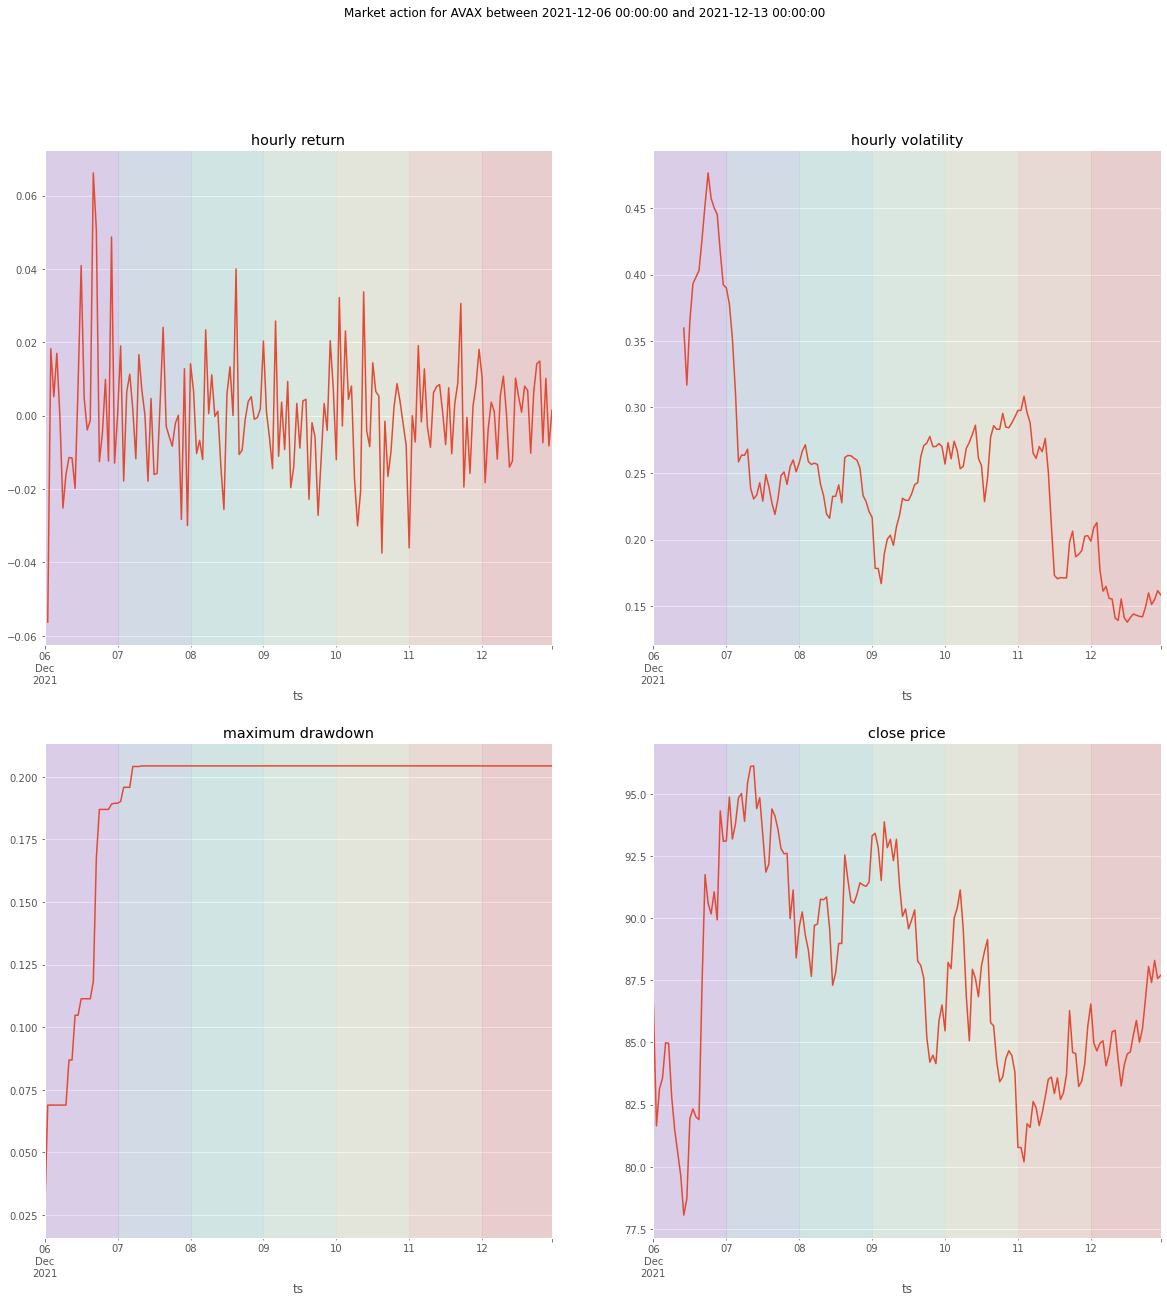

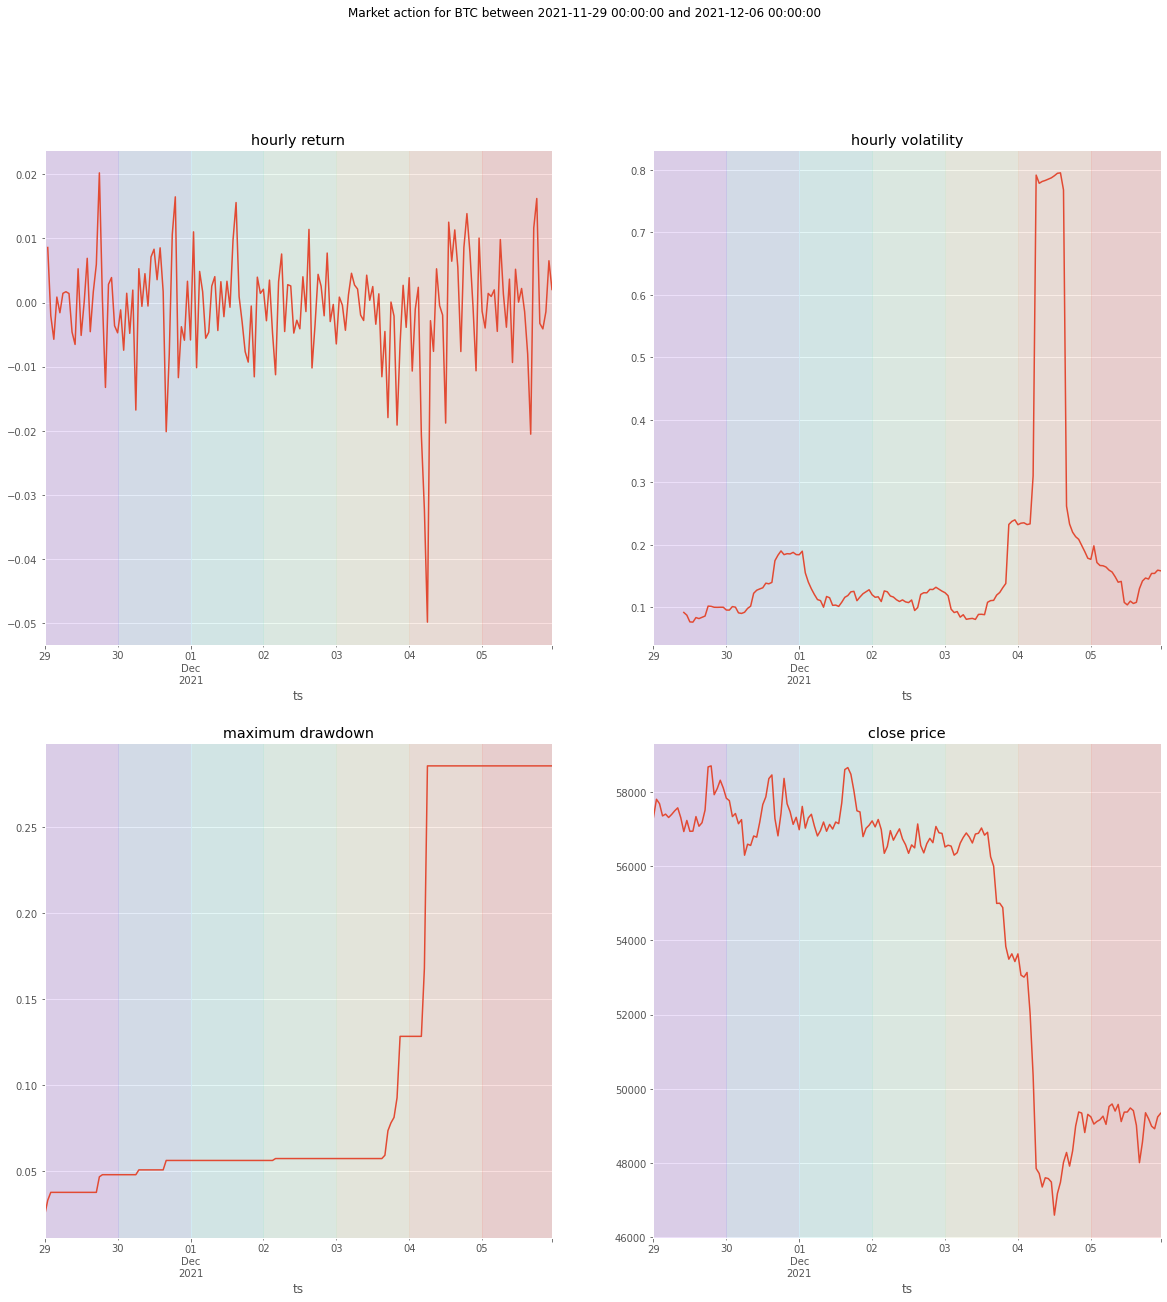

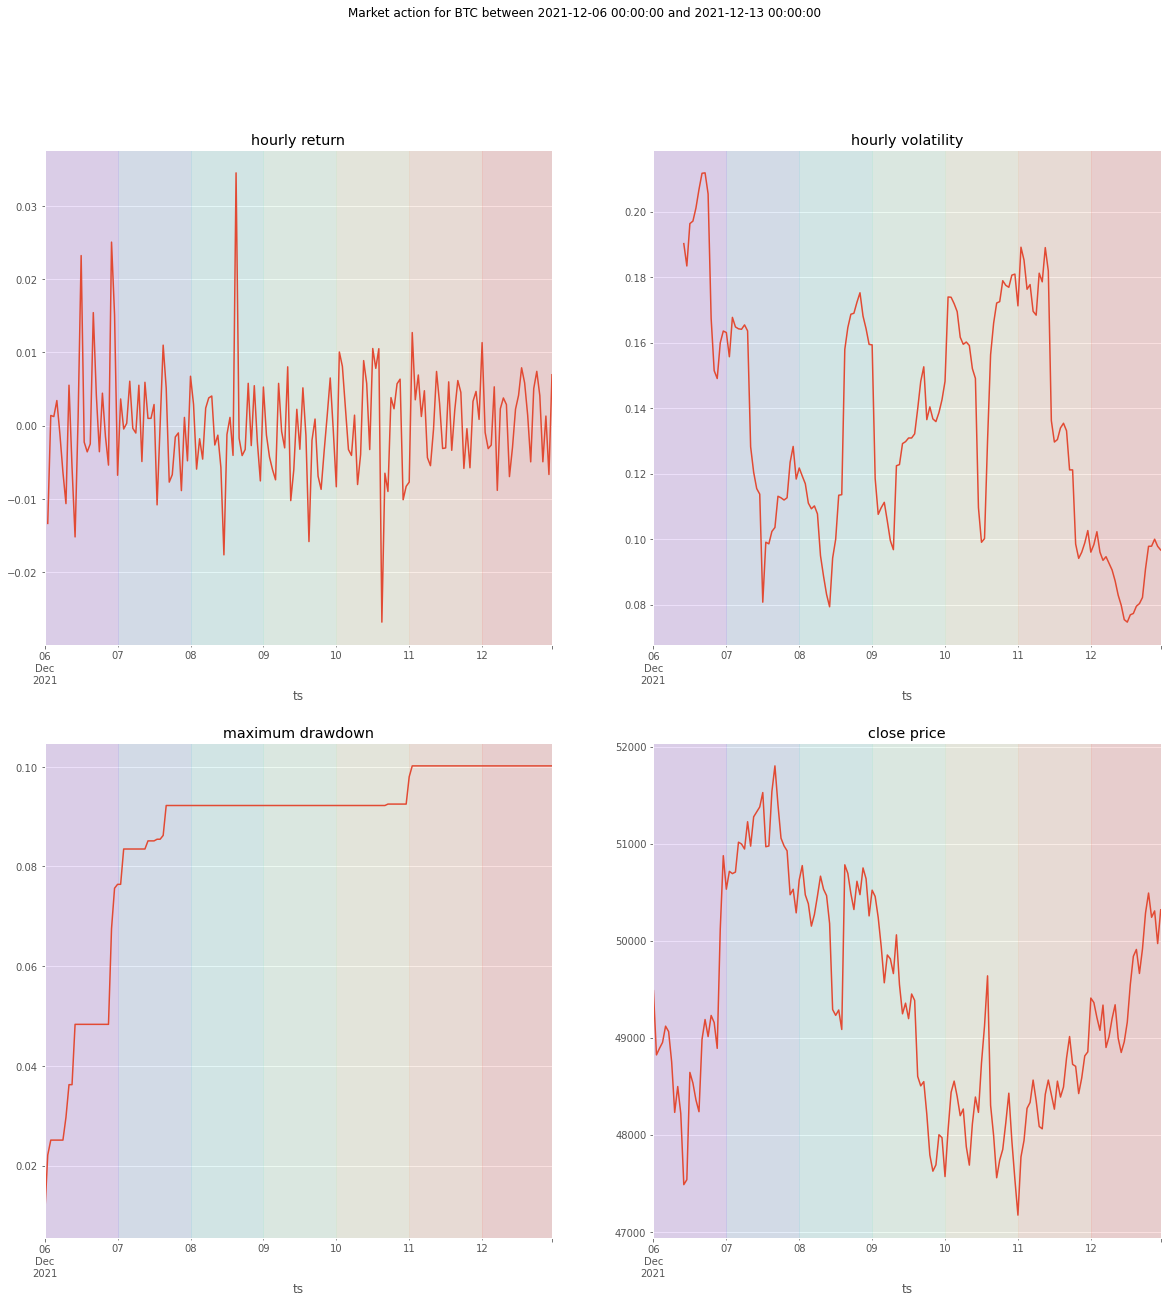

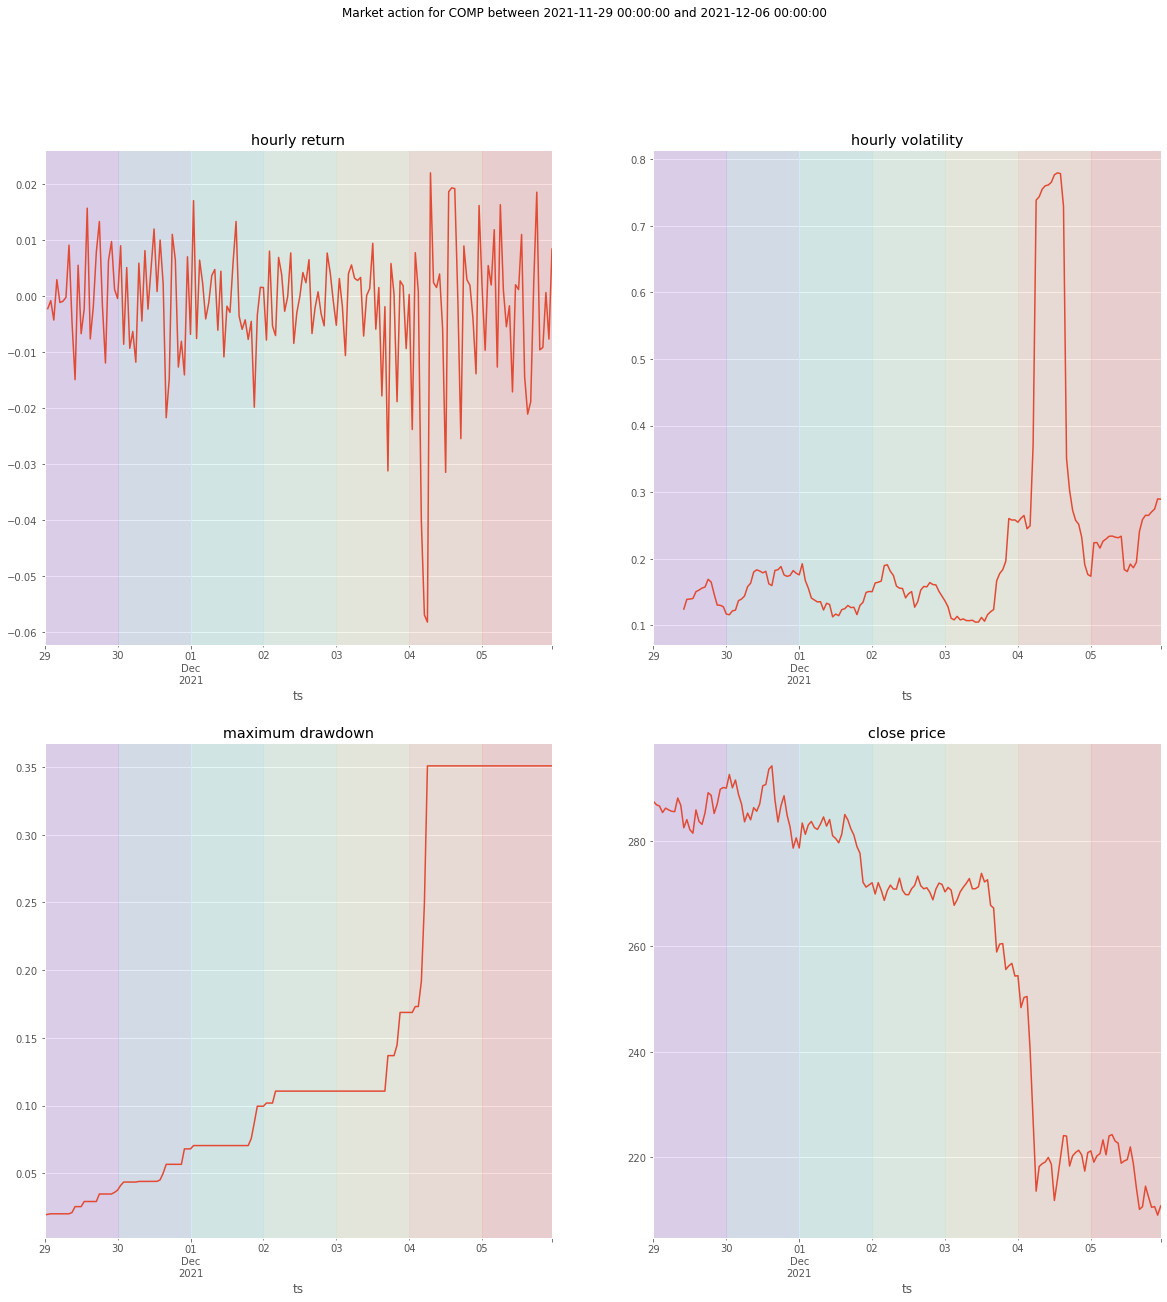

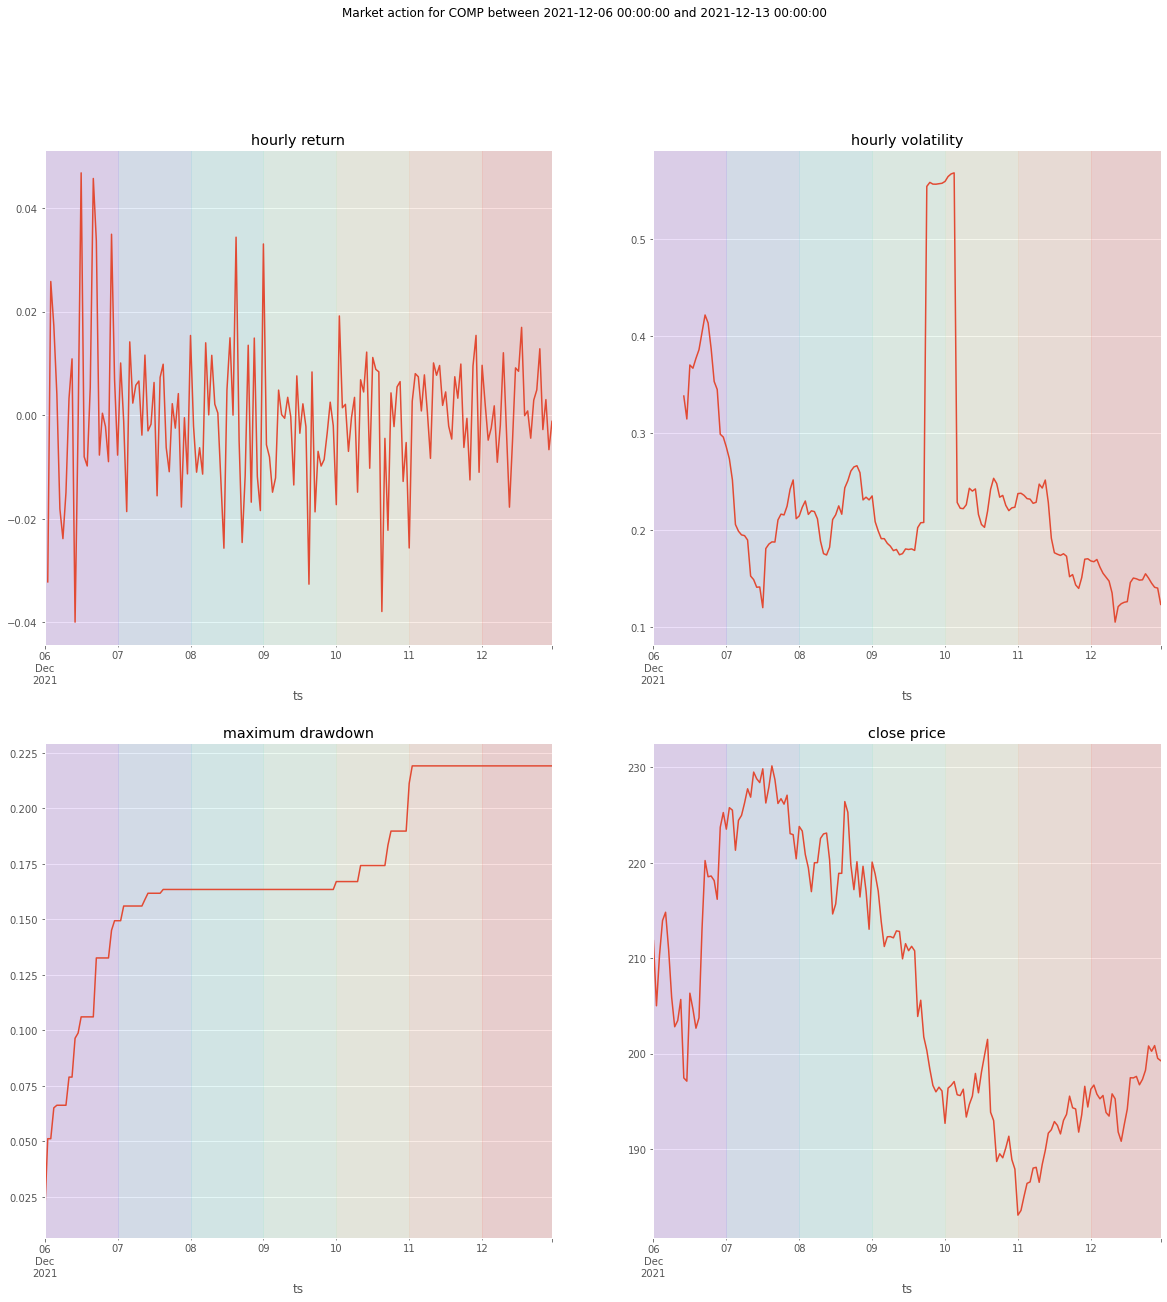

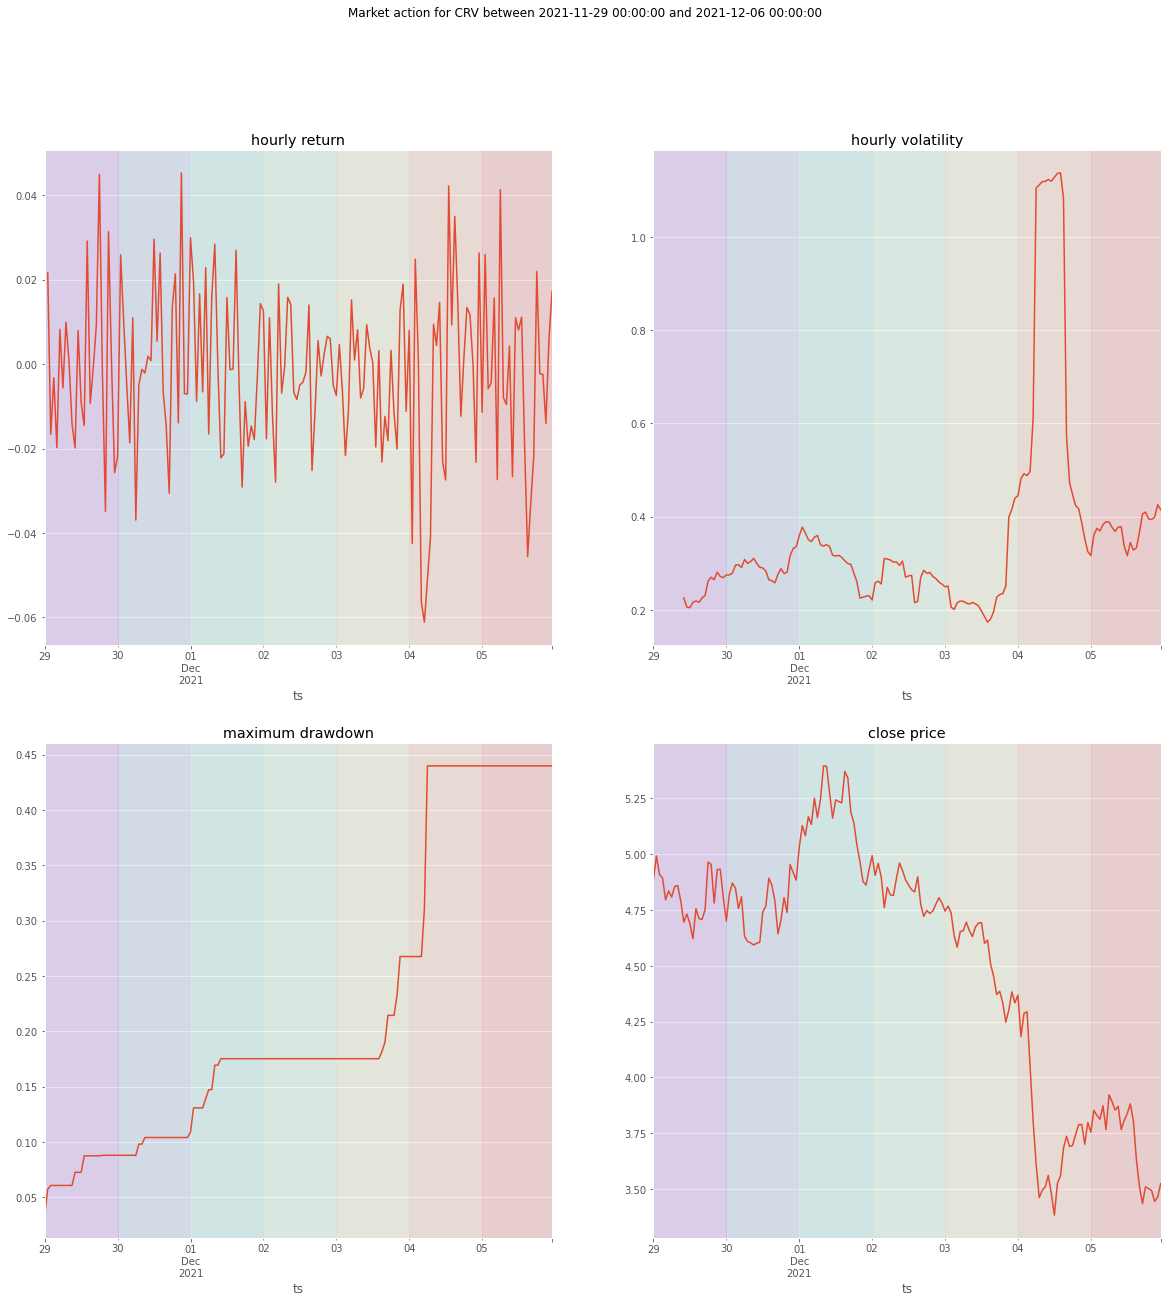

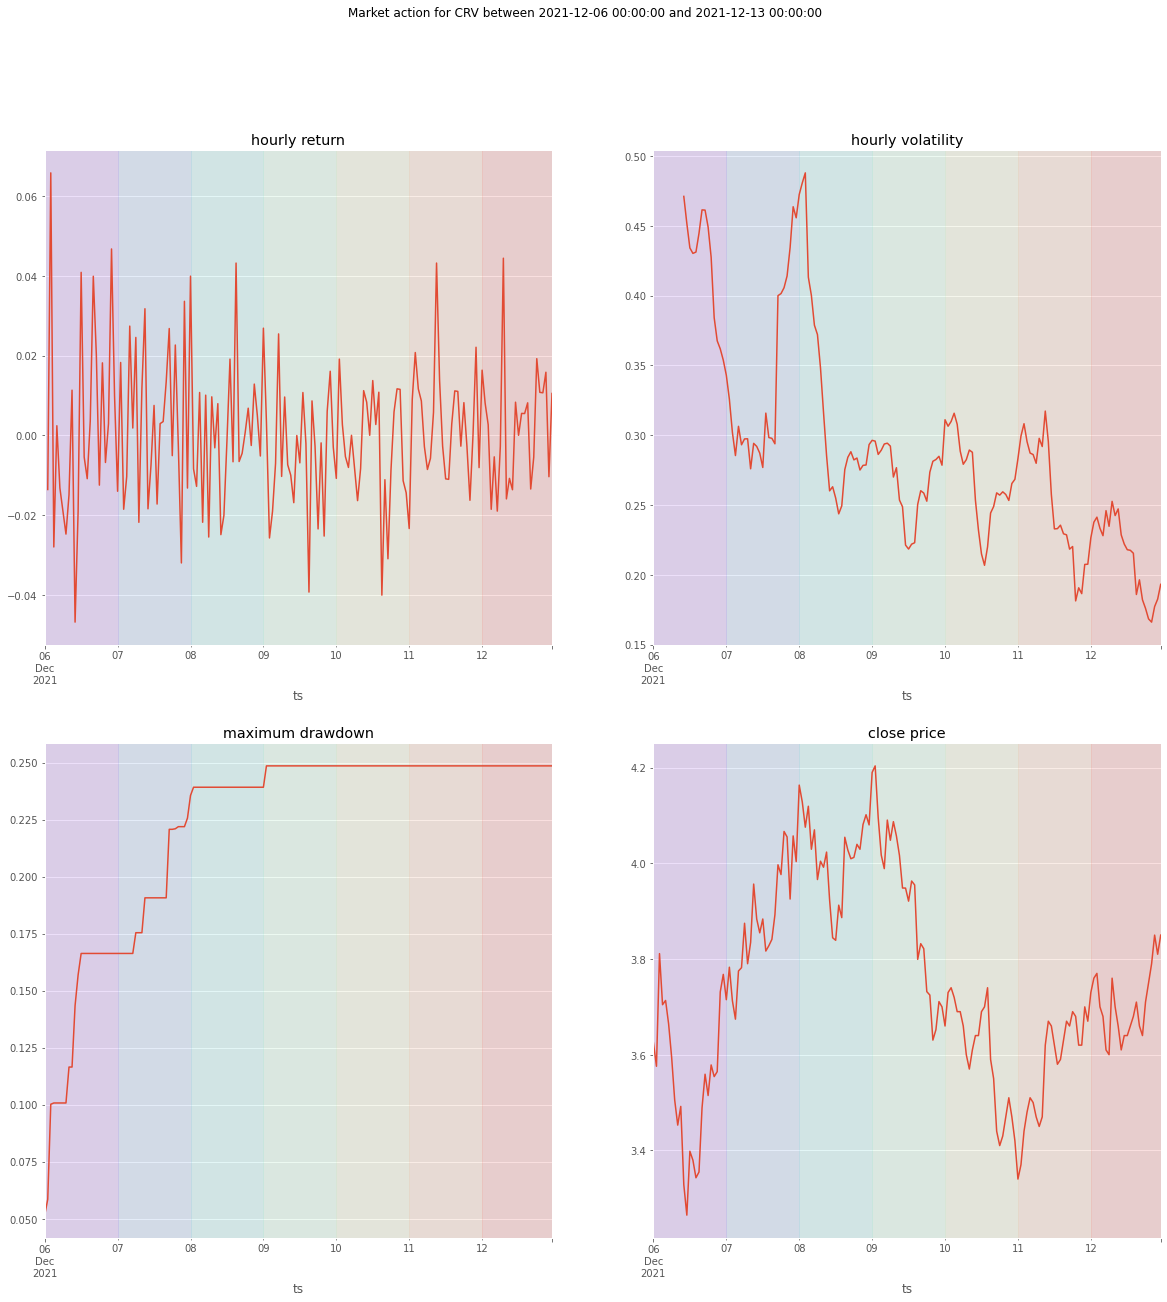

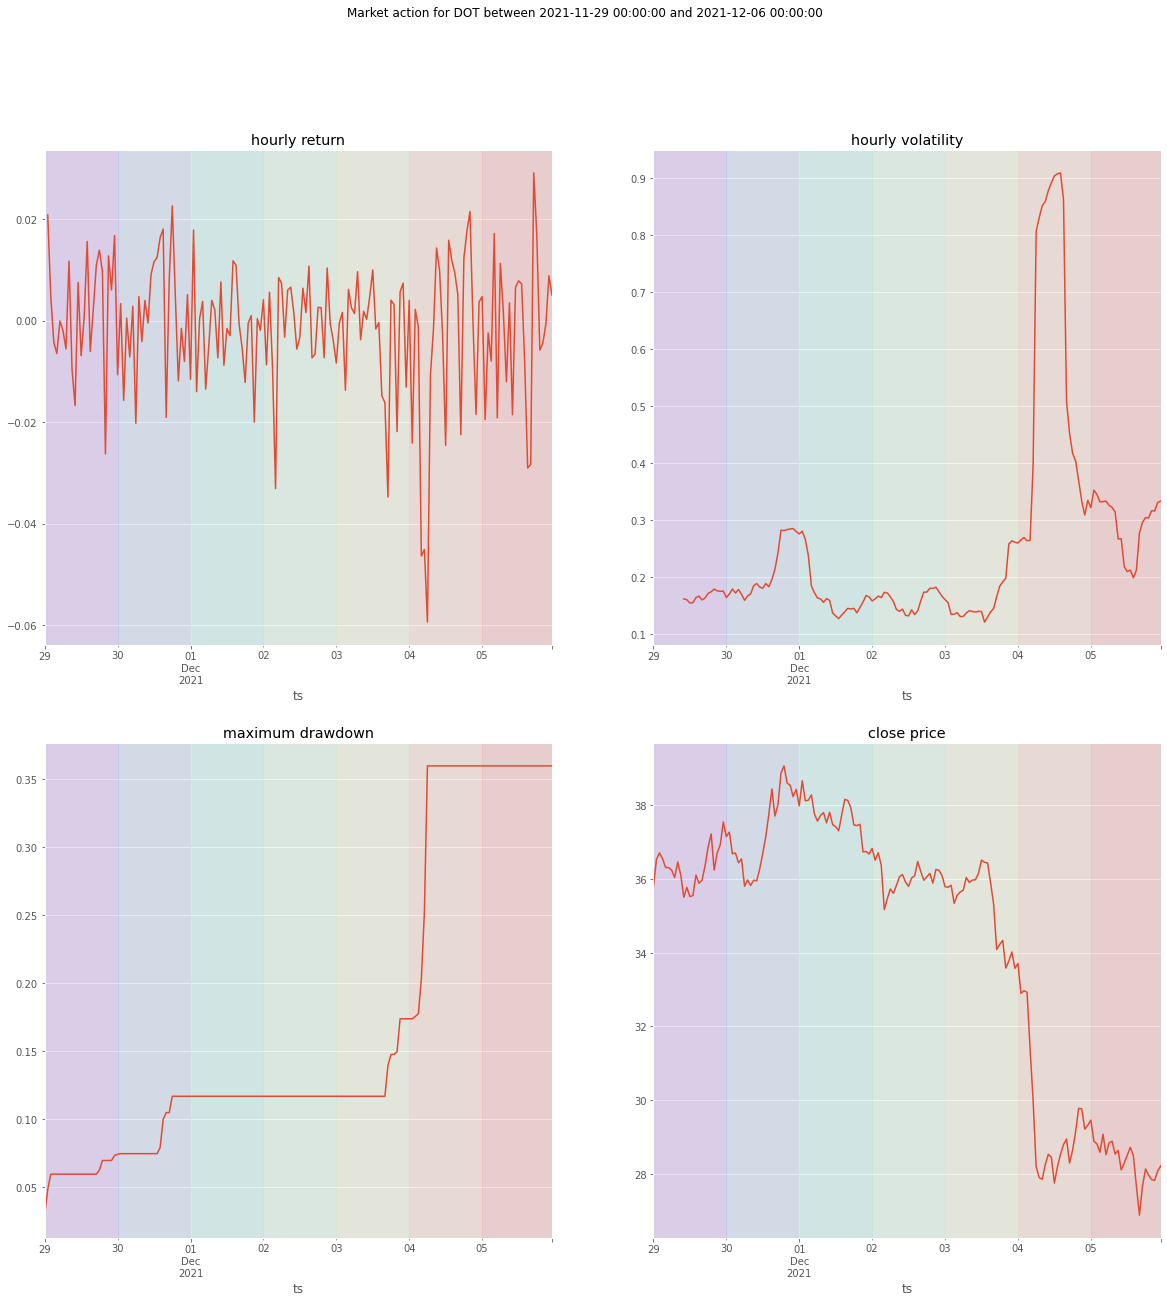

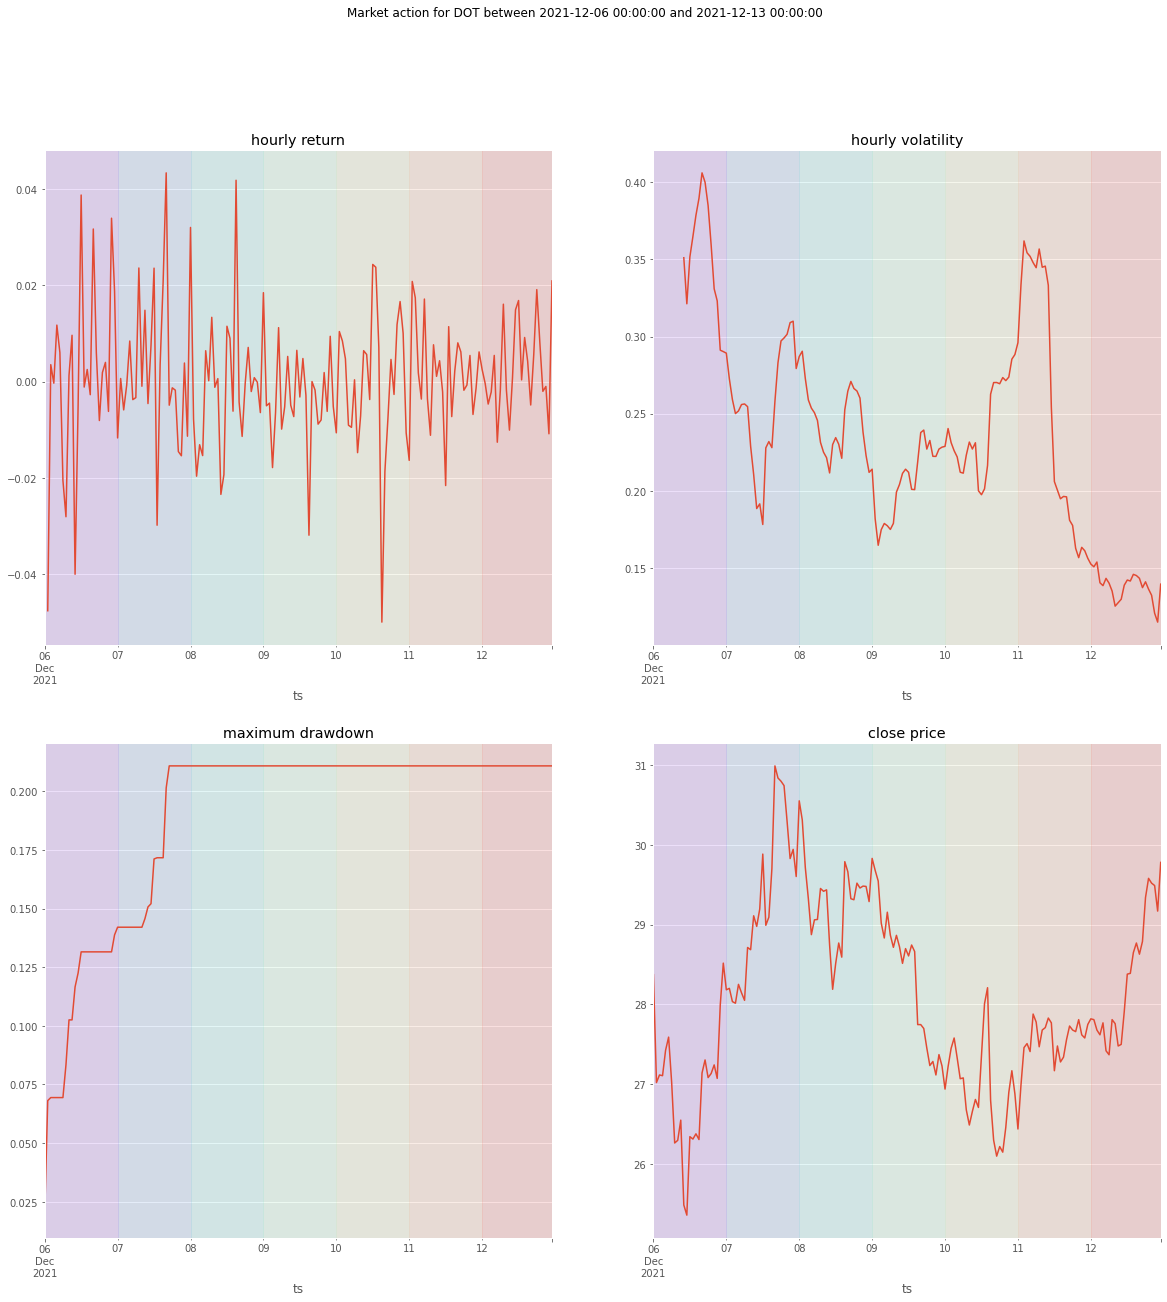

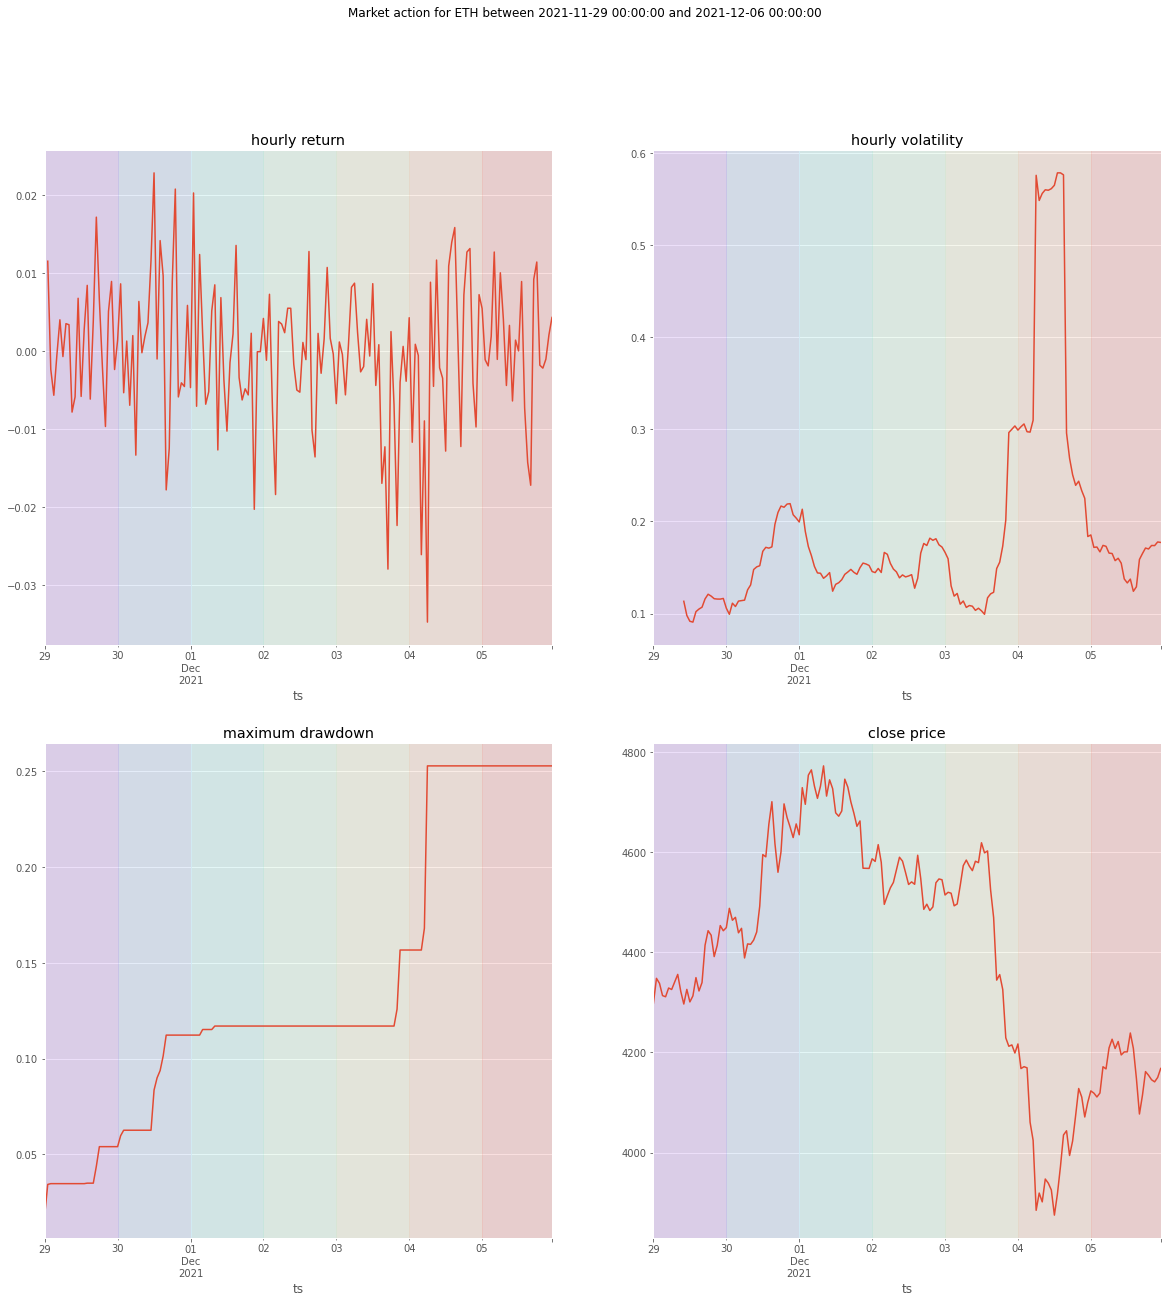

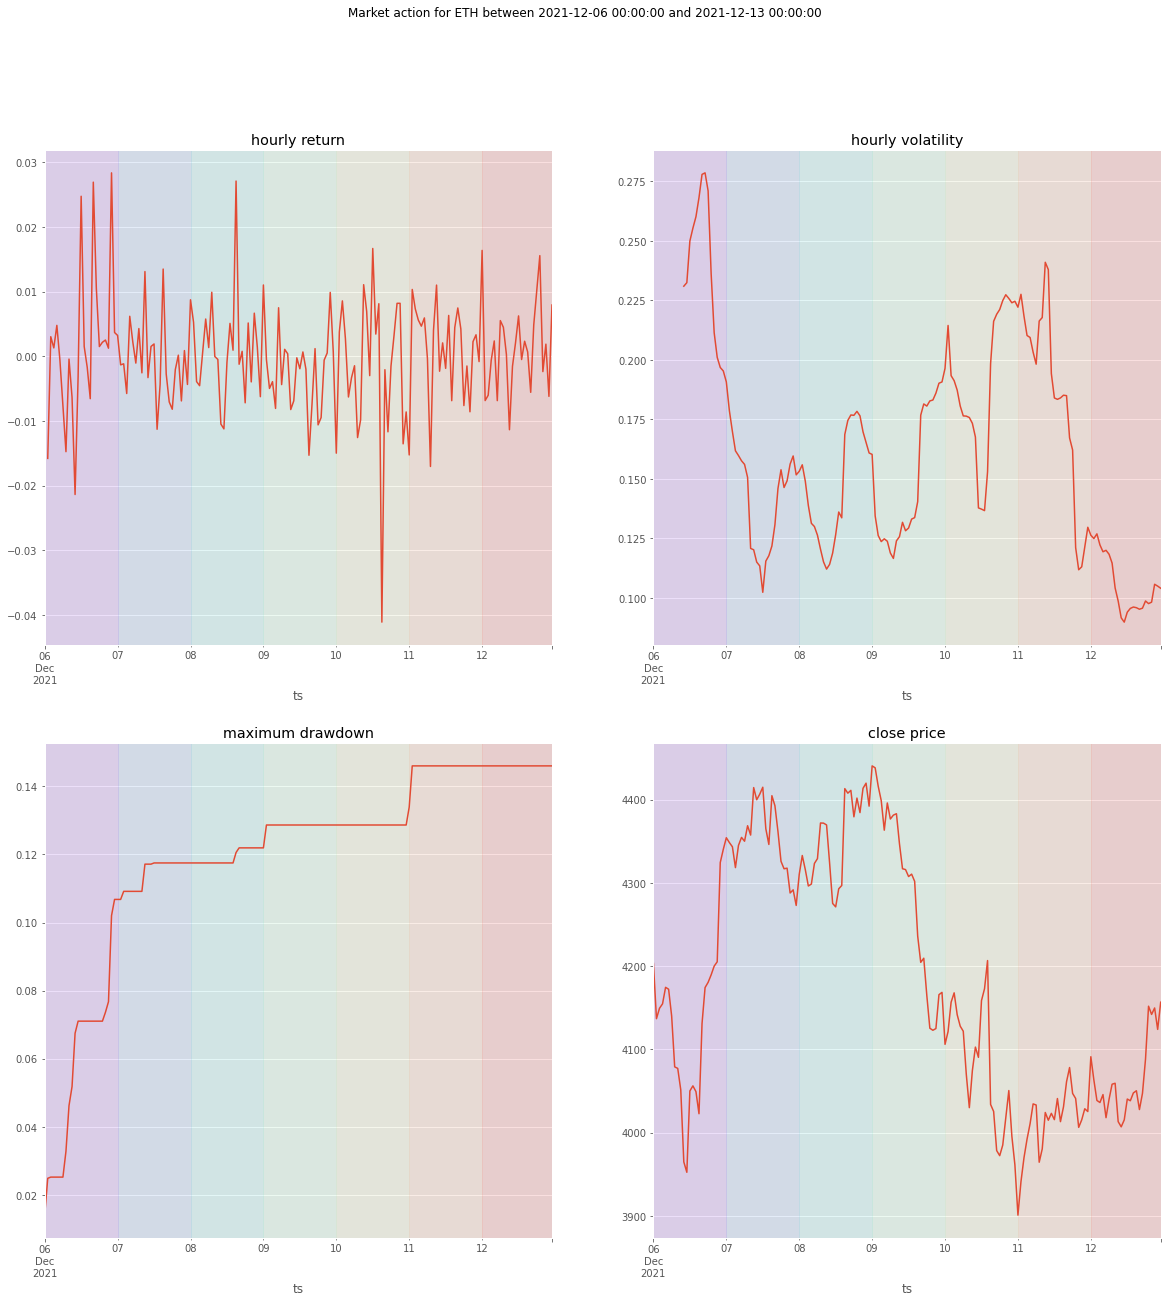

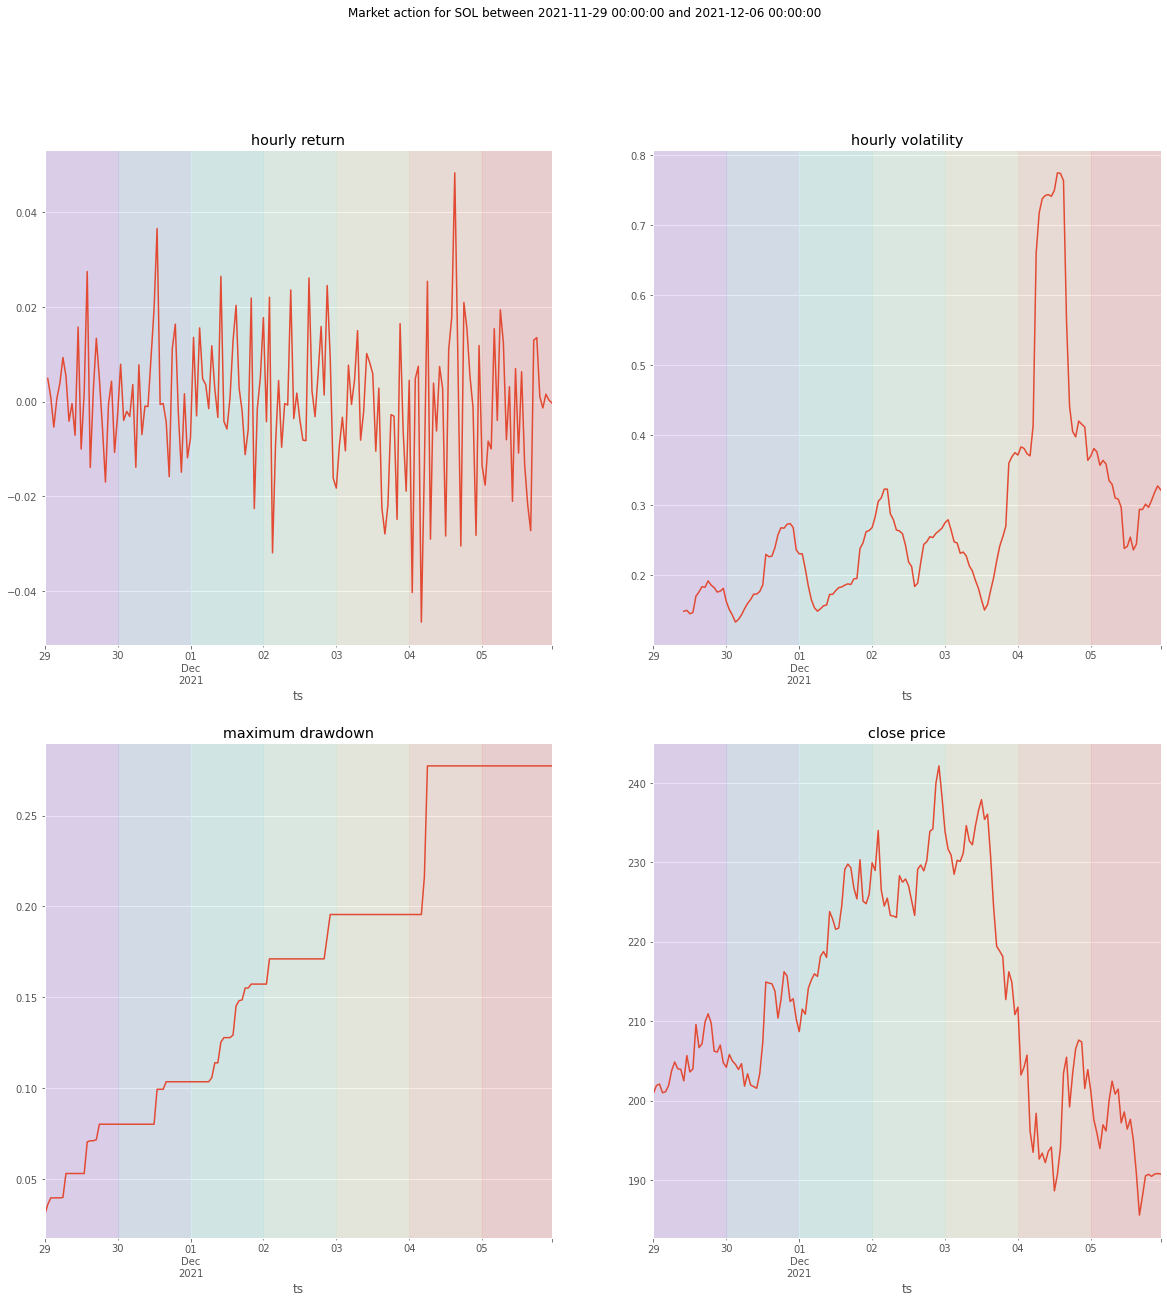

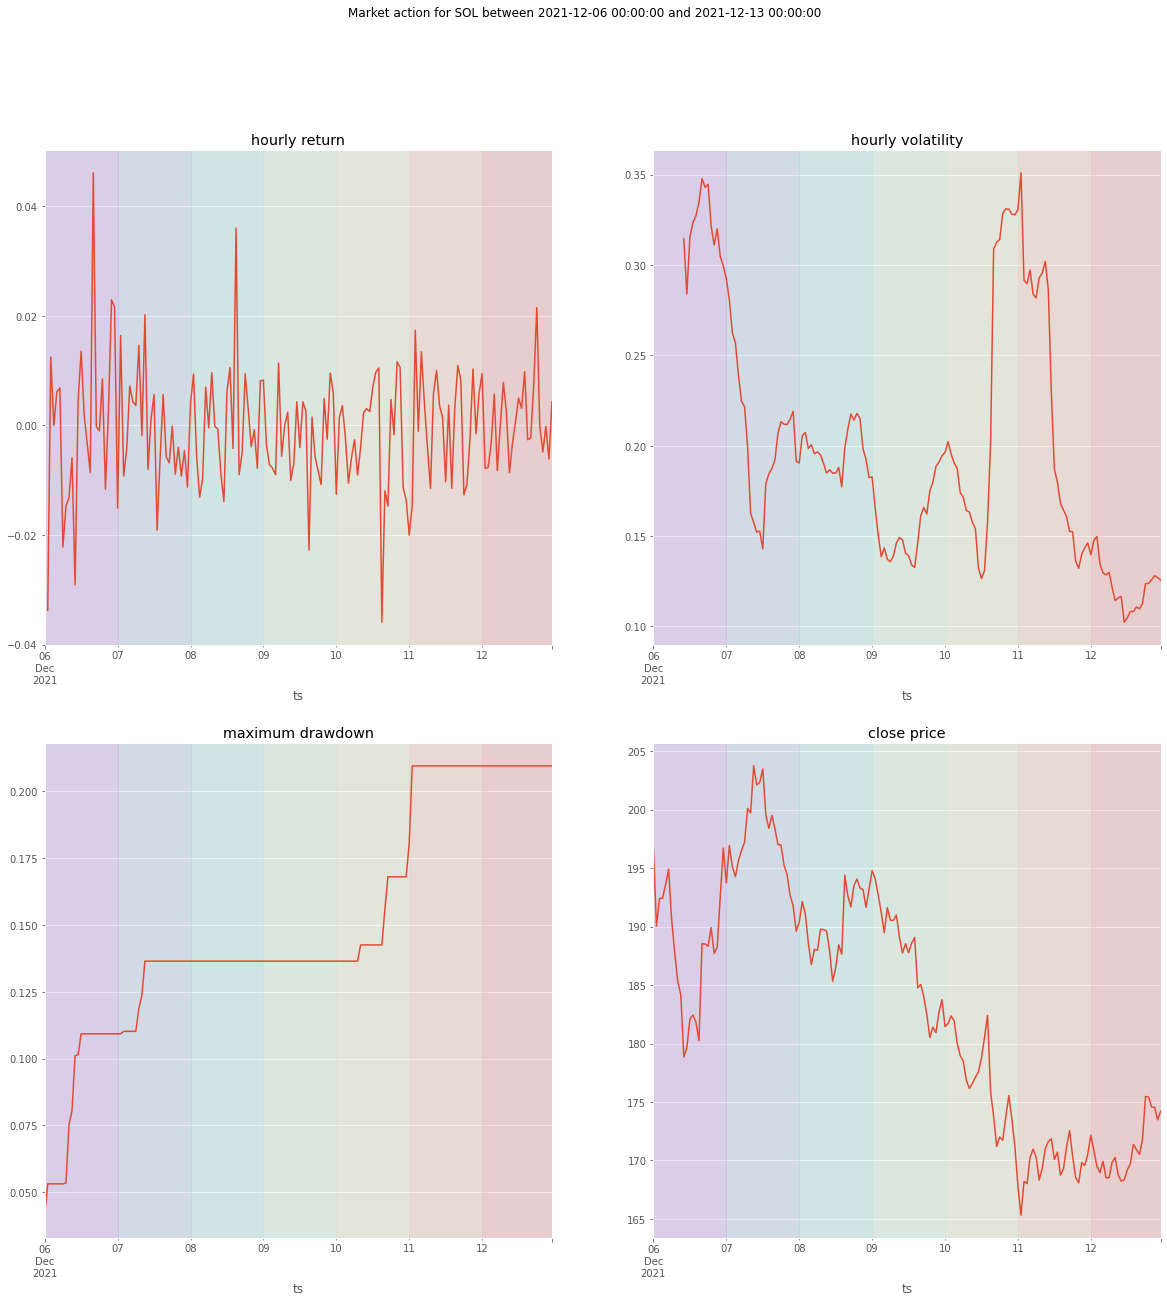

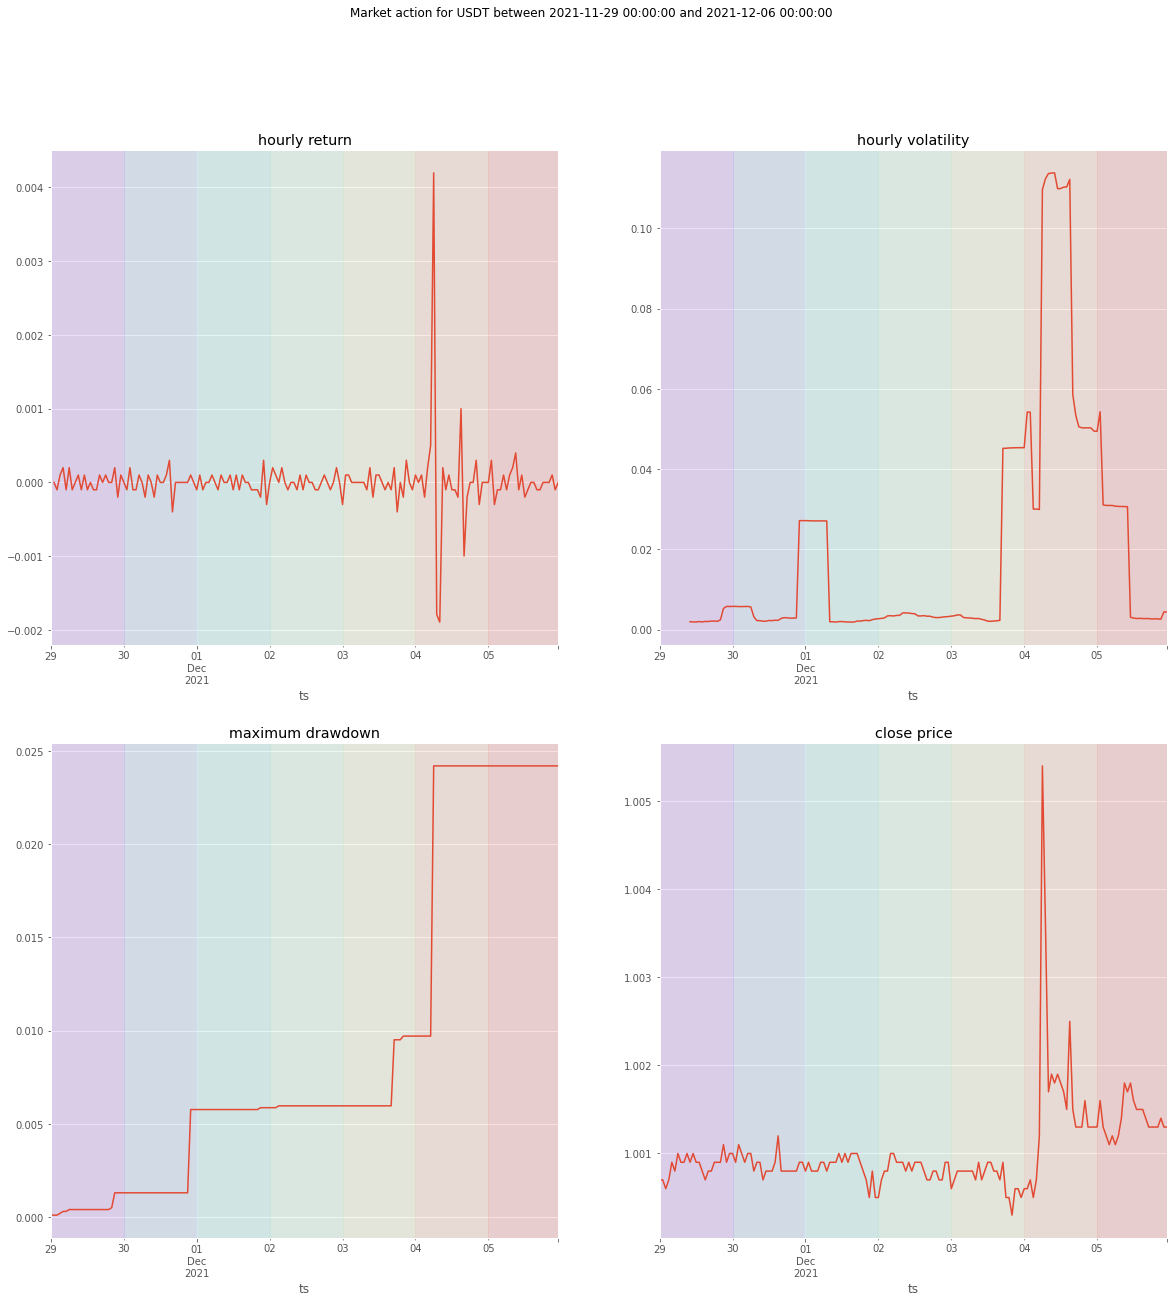

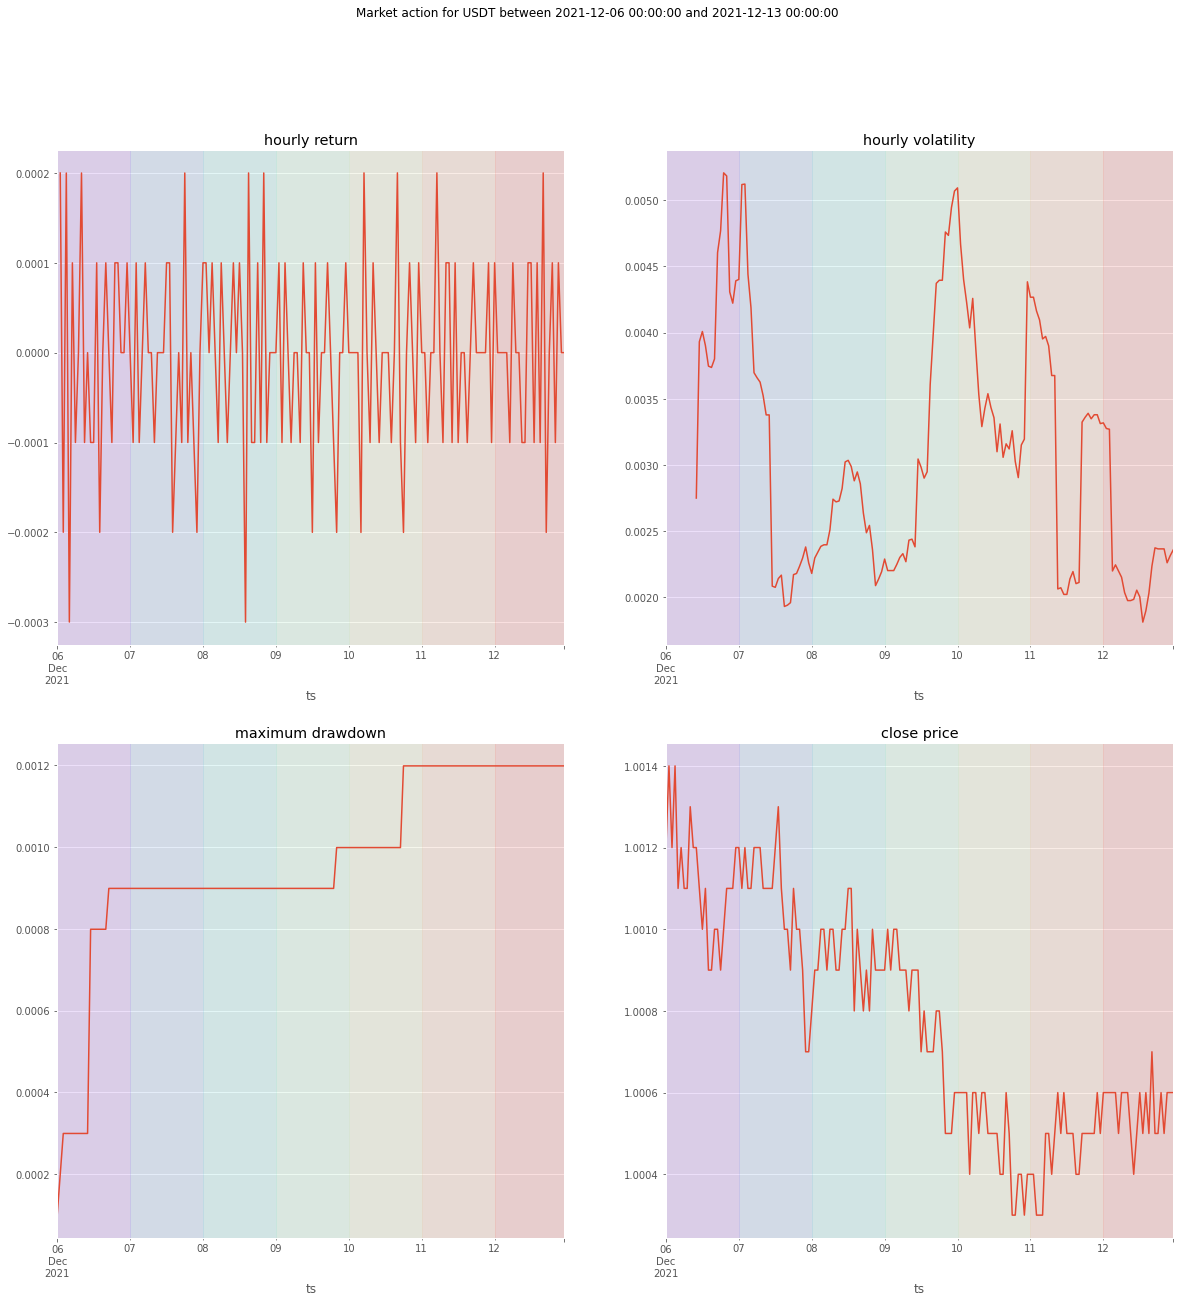

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [32]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]